In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
X_train = X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [49]:
w_init = np.zeros((4,))
b_init = 0.

In [50]:
def calcSquaredError(X, y, w, b):
    squaredError = 0
    for i in np.arange(len(X)):
        y_hat = np.dot(w, X[i]) + b
        error = y_hat - y[i]
        squaredError += error ** 2
    return squaredError

def getPartialDerivatives(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        y_hat = np.dot(w, X[i]) + b
        error = y_hat - y[i]
        for j in range(n):
            dj_dw[j] += error * X[i,j]
        dj_db = dj_db + error
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

def multivariateLinearRegression(X_train, y_train, w_init, b_init, alpha, nOfIterations = 1000):
    m = len(X_train[0])
    w = w_init
    b = b_init
    J_hist = np.zeros(nOfIterations)

    for i in np.arange(nOfIterations):
        J = (1 / (2 * m)) * calcSquaredError(X_train, y_train, w, b)
        i % 10 == 0 and print(f'Iter {i}, cost = {J}')
        J_hist[i] = J
        dj_dw, dj_db = getPartialDerivatives(X_train, y_train, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db


    return w, b, J_hist

Iter 0, cost = 37138.5
Iter 10, cost = 522.7288979425161
Iter 20, cost = 522.6477131228718
Iter 30, cost = 522.5665995640117
Iter 40, cost = 522.4855572023866
Iter 50, cost = 522.4045859747088
Iter 60, cost = 522.3236858177427
Iter 70, cost = 522.2428566683167
Iter 80, cost = 522.1620984633093
Iter 90, cost = 522.081411139655
Iter 100, cost = 522.0007946343483
Iter 110, cost = 521.9202488844354
Iter 120, cost = 521.8397738270224
Iter 130, cost = 521.7593693992682
Iter 140, cost = 521.6790355383886
Iter 150, cost = 521.5987721816546
Iter 160, cost = 521.5185792663982
Iter 170, cost = 521.4384567299962
Iter 180, cost = 521.3584045098926
Iter 190, cost = 521.278422543579
Iter 200, cost = 521.1985107686071
Iter 210, cost = 521.1186691225814
Iter 220, cost = 521.0388975431625
Iter 230, cost = 520.9591959680685
Iter 240, cost = 520.8795643350719
Iter 250, cost = 520.8000025819972
Iter 260, cost = 520.7205106467277
Iter 270, cost = 520.6410884672018
Iter 280, cost = 520.5617359814131
Iter 290

Iter 6020, cost = 484.77822776045195
Iter 6030, cost = 484.73023347534
Iter 6040, cost = 484.68228094739436
Iter 6050, cost = 484.63437013949516
Iter 6060, cost = 484.5865010145576
Iter 6070, cost = 484.5386735355328
Iter 6080, cost = 484.4908876653989
Iter 6090, cost = 484.4431433671711
Iter 6100, cost = 484.39544060389636
Iter 6110, cost = 484.34777933865297
Iter 6120, cost = 484.30015953455523
Iter 6130, cost = 484.25258115474685
Iter 6140, cost = 484.20504416240715
Iter 6150, cost = 484.15754852074616
Iter 6160, cost = 484.1100941930072
Iter 6170, cost = 484.06268114246825
Iter 6180, cost = 484.01530933243566
Iter 6190, cost = 483.96797872625245
Iter 6200, cost = 483.9206892872922
Iter 6210, cost = 483.8734409789589
Iter 6220, cost = 483.8262337646961
Iter 6230, cost = 483.7790676079727
Iter 6240, cost = 483.7319424722946
Iter 6250, cost = 483.6848583211963
Iter 6260, cost = 483.63781511824925
Iter 6270, cost = 483.59081282705057
Iter 6280, cost = 483.54385141123817
Iter 6290, cost

Text(0.5, 1.0, 'Model cost vs. iteration')

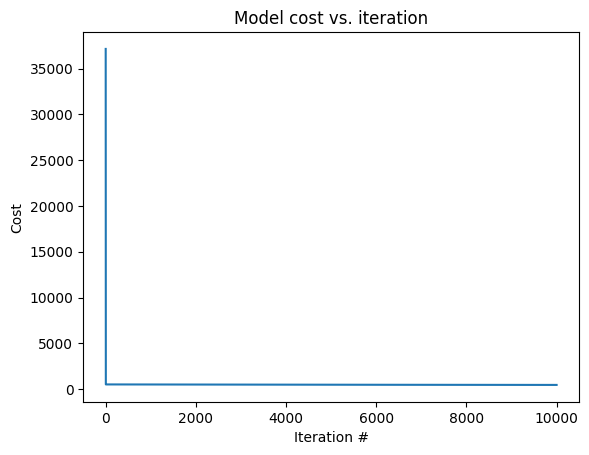

In [51]:
alpha = 5e-7
nOfIterations=10000
w,b,J_hist = multivariateLinearRegression(X_train, y_train, w_init, b_init, alpha, nOfIterations)
plt.plot(np.arange(nOfIterations), J_hist)
plt.xlabel('Iteration #')
plt.ylabel('Cost')
plt.title('Model cost vs. iteration')